In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pymc3 as pm

In [2]:
#!head two_factory_data.txt

head: cannot open 'two_factory_data.txt' for reading: No such file or directory


In [3]:
data = np.genfromtxt('flip_data.txt', names=True)

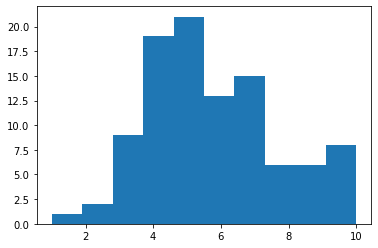

In [6]:
plt.hist(data['z'], bins=10);

In [24]:
z = data['z']
N= data['N']

In [25]:
k = 2

with pm.Model() as model:
    #set up weights of factory
    w = pm.Dirichlet('weight', a=np.ones(k), shape=k, testval=np.ones(k)/k)
    
    #Now assign an omega,kappa for each factory
    omega = pm.Beta('omega', 2, 2, shape=k, testval=np.linspace(.2,.8,k))
    kappa = pm.Gamma('kappa', 1, .01, shape=k)
    
    #Don't have a clue
    switch = pm.math.switch(omega[1] - omega[0] < 0, -np.inf, 0)
    order_model_potential = pm.Potential('order_mode_potential', switch)
    
    #Assign coins to a factory hence the shape data
    factory = pm.Categorical('factory', p=w, shape=len(N))
    
    a = omega[factory] * (kappa[factory]-2) + 1
    b = (1 - omega[factory]) * (kappa[factory] - 2) + 1
    theta = pm.Beta('theta', a, b, shape=len(N))
    
    y = pm.Binomial('y', n=N, p=theta, observed=z)

In [26]:
with model:
    trace = pm.sample(5000)

Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [theta, kappa, omega, weight]
>BinaryGibbsMetropolis: [factory]
Sampling chain 1, 568 divergences: 100%|██████████| 5500/5500 [04:39<00:00, 19.70it/s]
There were 325 divergences after tuning. Increase `target_accept` or reparameterize.
There were 923 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


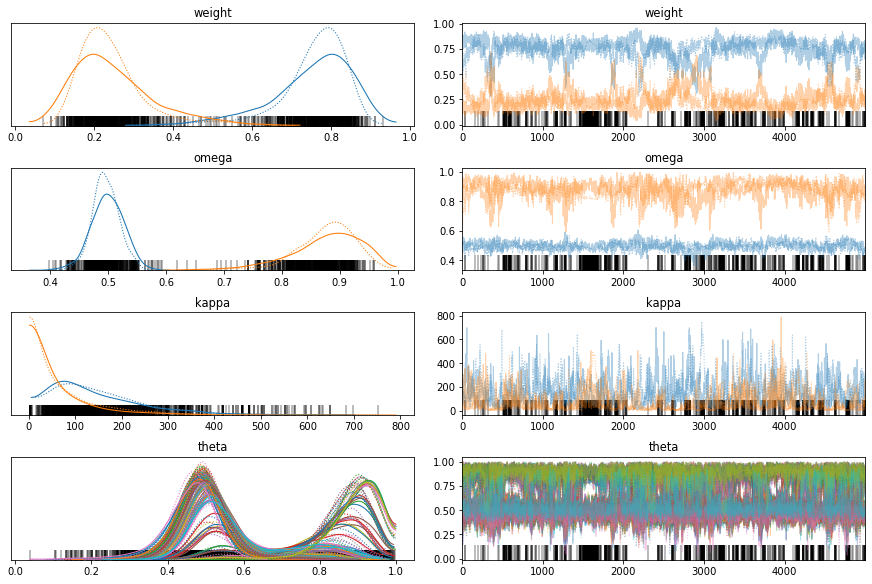

In [27]:
#pm.autocorrplot(trace, varnames=['weight', 'omega', 'kappa'])
pm.traceplot(trace, ['weight', 'omega', 'kappa', 'theta']);

In [ ]:
# One factory

In [10]:
k = 1

with pm.Model() as model:
    #w = pm.Dirichlet('weight', a=np.ones(k), shape=2, testval=[0.5, 0.5])
    
    omega = pm.Beta('omega', 2, 2, shape=1, testval=[0.5])
    kappa = pm.Gamma('kappa', 1, .01, shape=1)
    
    #switch = pm.math.switch(omega[1] - omega[0] < 0, -np.inf, 0)
    #order_model_potential = pm.Potential('order_mode_potential', switch)
    
    #factory = pm.Categorical('factory', p=w, shape=len(data))
    
    theta = pm.Beta('theta', omega* kappa,
                             (1 - omega) * kappa, shape=len(data))
    
    y = pm.Binomial('y', n=data['N'], p=theta, observed=data['z'])

In [11]:
with model:
    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta, kappa, omega]
Sampling chain 1, 0 divergences: 100%|██████████| 5500/5500 [00:27<00:00, 201.50it/s]
The number of effective samples is smaller than 25% for some parameters.


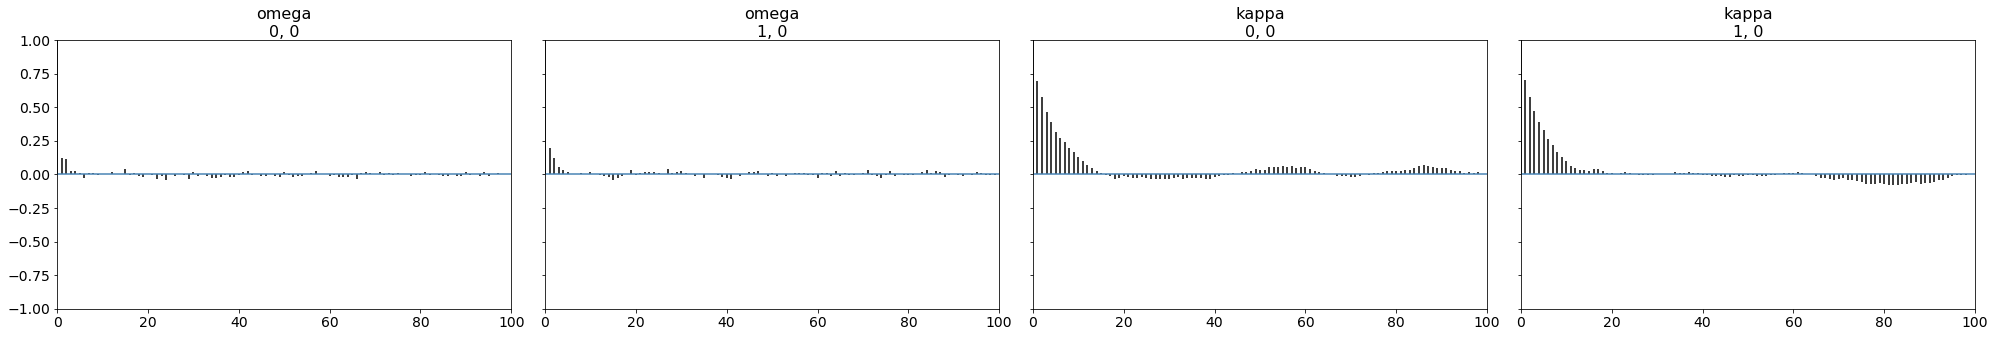

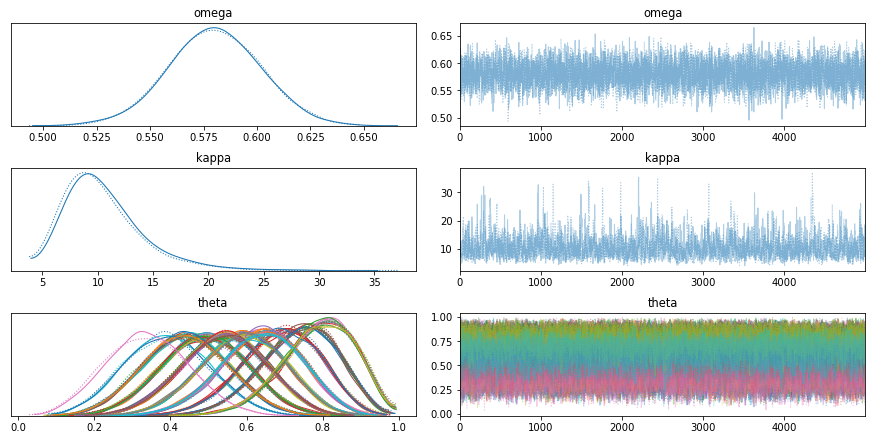

In [13]:
pm.autocorrplot(trace, varnames=['omega', 'kappa'])
pm.traceplot(trace, ['omega', 'kappa', 'theta']);

In [14]:
# single coin from data, ho 

In [16]:
z = data['z']
N= data['N']

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:01<00:00, 840.74it/s]


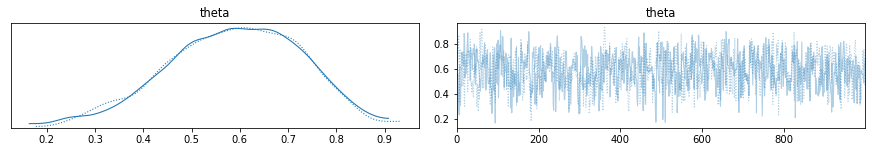

In [17]:

coin = 0 

with pm.Model() as single_coin_model:
    theta = pm.Beta('theta', 1, 1)
    
    y = pm.Binomial('y', n=N[coin], p=theta, observed=z[coin])
    trace = pm.sample(1000)
    pm.traceplot(trace)

In [18]:
# now expand

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [kappa]
Sampling chain 1, 3 divergences: 100%|██████████| 1500/1500 [00:01<00:00, 875.27it/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


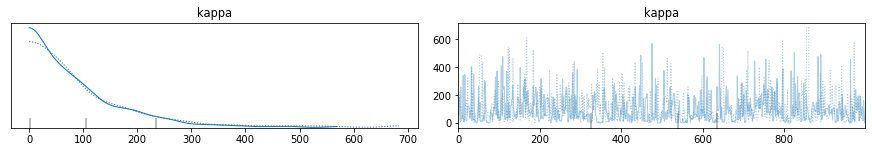

In [19]:
with pm.Model() as model:
    kappa = pm.Gamma('kappa', 1, 0.01)
    trace = pm.sample(1000)
    pm.traceplot(trace)

In [ ]:
#Add a kappa and omega

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta, kappa, omega]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:08<00:00, 169.97it/s]
The number of effective samples is smaller than 25% for some parameters.


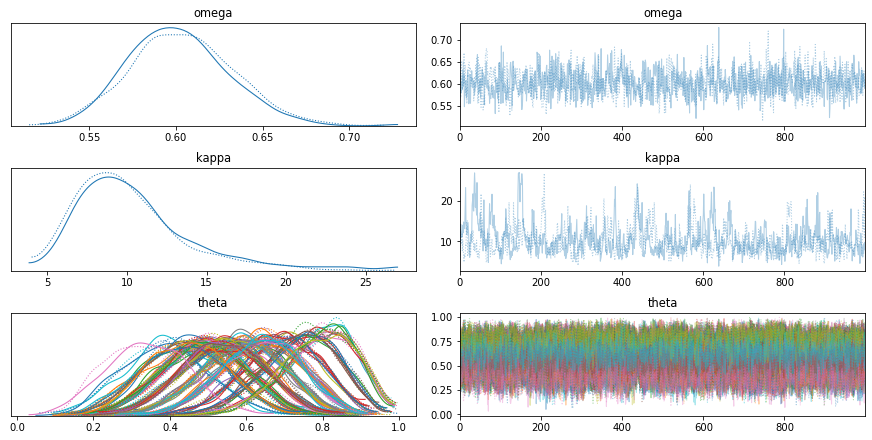

In [23]:
with pm.Model() as single_factory_model:
    omega = pm.Beta('omega' ,2,2)
    
    kappa = pm.Gamma('kappa', 1, 0.01)
    
    a= omega*(kappa-2) +1
    b = (1-omega)*(kappa-2) +1
    theta = pm.Beta('theta', a, b, shape=len(N))
    
    y = pm.Binomial('y', n=N , p=theta, observed=z)
    
    trace = pm.sample(1000)
    pm.traceplot(trace)